In [1]:
from toolkit.logger import Logger
from toolkit.classes import DataFrameCreator
from toolkit.pytorch_tools import CustomImageDataLoader
# from toolkit.pytorch_tools import NeuralNetwork
from torchvision.transforms import Compose
# from torchvision.transforms import Resize
# from torchvision.transforms import Normalize
from torchvision.transforms import ToPILImage
from torchvision.transforms import ToTensor
# from torchvision.transforms import RandomHorizontalFlip
# from torchvision.transforms import RandomVerticalFlip
# from torchvision.transforms import RandomRotation
# from torchvision.transforms import RandomPerspective

import torch
import gc

In [2]:
torch.cuda.empty_cache()
gc.collect()
logger = Logger("main").get_logger()

In [3]:
data = DataFrameCreator()

In [4]:
data.load_dataset(dataset="./data/sd1_sample/extracted_imgs", labels="./data/sd1_sample/labels/")
data.split_dataset()
data.info()

[    INFO    ] Dataset loaded from ./data/sd1_sample/extracted_imgs with labels from ./data/sd1_sample/labels/
[    INFO    ] Name :          dataset
[    INFO    ] Type:           ('dataset',)
[    INFO    ] Columns:        ('img_path', 'img_filename', 'img', 'label_path', 'label_filename', 'label', 'type')
[    INFO    ] Shape:          (8733, 7)
[    INFO    ] File types:     ('jpg',)
[    INFO    ] Name :          train
[    INFO    ] Type:           ('dataset',)
[    INFO    ] Columns:        ('img_path', 'img_filename', 'img', 'label_path', 'label_filename', 'label', 'type')
[    INFO    ] Shape:          (6289, 7)
[    INFO    ] File types:     ('jpg',)
[    INFO    ] Name :          validation
[    INFO    ] Type:           ('dataset',)
[    INFO    ] Columns:        ('img_path', 'img_filename', 'img', 'label_path', 'label_filename', 'label', 'type')
[    INFO    ] Shape:          (1746, 7)
[    INFO    ] File types:     ('jpg',)
[    INFO    ] Name :          test
[    INFO   

In [6]:
transform = {
    "train": Compose(
        [
            ToPILImage(),
            ToTensor(),
        ]
    ),
    "validation": Compose([ToPILImage(), ToTensor()]),
    "test": Compose([ToPILImage(), ToTensor()]),
}
target_transform = {"train": None, "validation": None, "test": None}

loader = CustomImageDataLoader(
    dataset=data,
    image_col="img",
    label_col="label",
    transform=transform,
    target_transform=target_transform,
)
loader.create_dataloaders(batch_size=8)

[    INFO    ] CustomImageDataSet created
[    INFO    ] Setting dataloader subprocesses to 8
[    INFO    ] Dataloaders created


In [6]:
model = NeuralNetwork(name="AlexNet")
model.init_device()
model.results.create_dashboard(interval=10)
model.results.dashboard.run_server()

[    INFO    ] Model filename: results/AlexNet/20230226_192513.pth
[    INFO    ] Results filename: results/AlexNet/20230226_192513.csv
[    INFO    ] Neural Network constructed: AlexNet
[    INFO    ] NeuralNetwork(
  (layers): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
    (14): Line

Dash app running on http://127.0.0.1:8050/


In [7]:
epochs = 20

model.train(epochs=epochs, train_loader=loader["train"], validation_loader=loader["validation"])

[    INFO    ] Model training started
[    INFO    ] Epoch:    0 Loss:  0.6932 Accuracy  0.5066  Validation loss:  0.6935   Validation accuracy:  0.4635
[    INFO    ] Epoch:    1 Loss:  0.6932 Accuracy  0.5197  Validation loss:  0.6931   Validation accuracy:  0.5312
[    INFO    ] Epoch:    2 Loss:  0.6932 Accuracy  0.4868  Validation loss:  0.6933   Validation accuracy:  0.4844
[    INFO    ] Epoch:    3 Loss:  0.6928 Accuracy  0.5362  Validation loss:  0.6930   Validation accuracy:  0.5781
[    INFO    ] Epoch:    4 Loss:  0.6932 Accuracy  0.4901  Validation loss:  0.6932   Validation accuracy:  0.4948
[    INFO    ] Epoch:    5 Loss:  0.6934 Accuracy  0.4967  Validation loss:  0.6928   Validation accuracy:  0.5677
[    INFO    ] Epoch:    6 Loss:  0.6929 Accuracy  0.5461  Validation loss:  0.6934   Validation accuracy:  0.4948
[    INFO    ] Epoch:    7 Loss:  0.6934 Accuracy  0.4803  Validation loss:  0.6935   Validation accuracy:  0.5365
[    INFO    ] Epoch:    8 Loss:  0.6934 A

In [8]:
model.results.data

,loss,accuracy,validation_loss,validation_acc
0,0.693211,0.506579,0.693489,0.463542
1,0.693176,0.519737,0.693121,0.531250
2,0.693234,0.486842,0.693271,0.484375
3,0.692833,0.536184,0.693012,0.578125
4,0.693241,0.490132,0.693218,0.494792
5,0.693438,0.496711,0.692784,0.567708
6,0.692941,0.546053,0.693438,0.494792
7,0.693360,0.480263,0.693487,0.536458
8,0.693396,0.490132,0.692862,0.531250
9,0.693159,0.470395,0.693290,0.526042


In [9]:
model.save_model(epoch=model.results.data.index[-1], loss=model.results.data["loss"].iloc[-1])
model.results.save_data()

[    INFO    ] Model saved to results/AlexNet/20230226_192513.pth
[    INFO    ] Results saved to: results/AlexNet/20230226_192513.csv


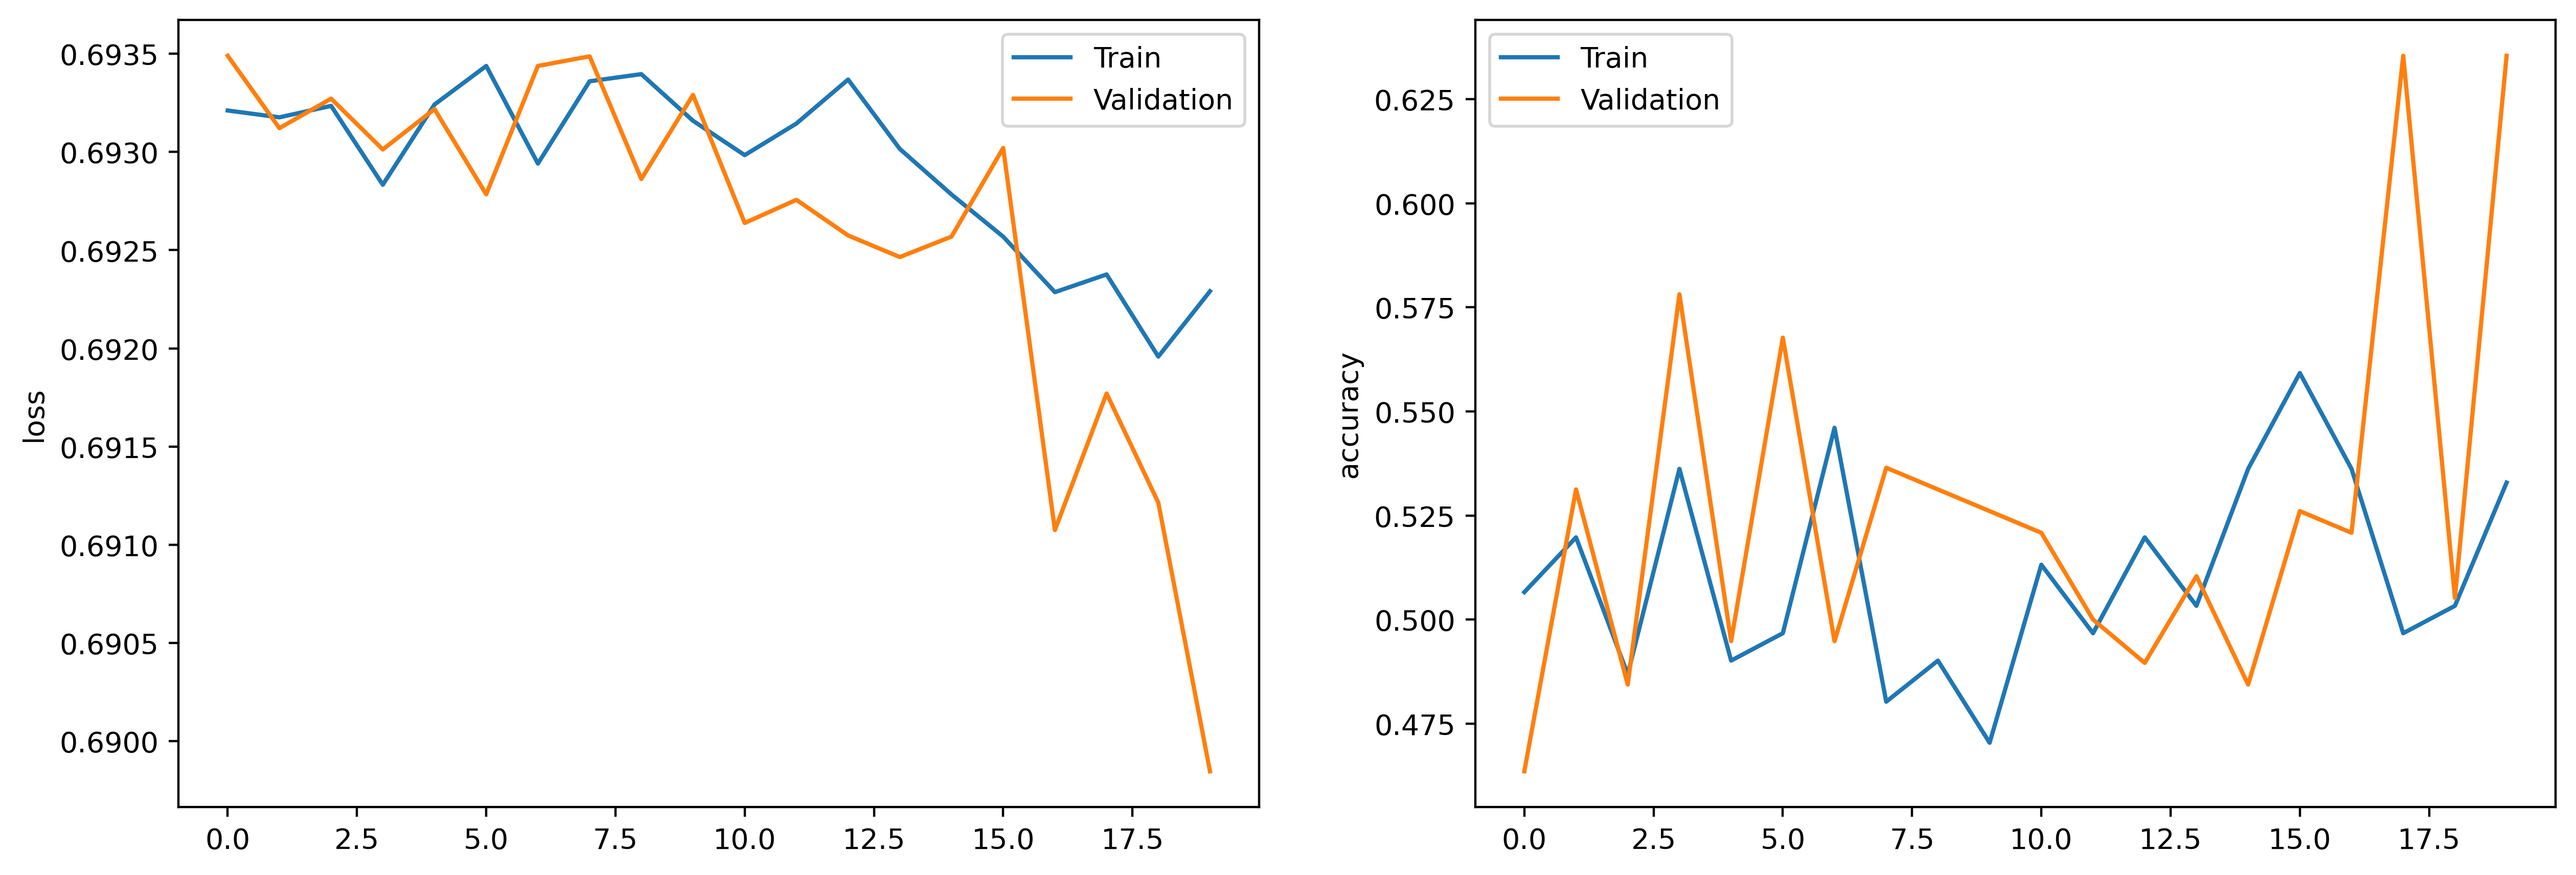

In [10]:
model.results.plot()